In [39]:
import pandas as pd
import numpy as np
import tweepy
import time
import json
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "MNtExuoBogl1cSCgbTg99axOn"
consumer_secret = "92ujLKA6rRo2hmYT5RUtFJWE7AcTY7rFNzdzSZwXN1yKAX5cfO"
access_token = "839884351219335169-wjwPEHm50YcZ2NRwdfsiEYVeJ2lNOq5"
access_token_secret = "Y2MlUCFEH6qP0x2eXE7FfD53B7Bp48UzUKBbRbhx0vbR3"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_list = ['@FoxNews', '@BBCWorld', '@CBSNews', '@nytimes', '@CNN']
df = {}

In [37]:
main_list = []
for target in target_list:
    sentiments = []
    counter = 1
    public_tweets = tweepy.Cursor(api.user_timeline, id=target).items(100)  
    for tweet in public_tweets:
        tweet_text = json.dumps(tweet._json, indent=3)
        tweet = json.loads(tweet_text)
        text = tweet['text']
        sentiments.append({"Date": tweet["created_at"], 
                       "Compound": analyzer.polarity_scores(tweet["text"])["compound"],
                       "Tweets Ago": counter})
        main_list.append({"Date": tweet["created_at"], 
                       "Compound": analyzer.polarity_scores(tweet["text"])["compound"],"Positive": analyzer.polarity_scores(tweet["text"])["pos"], "Negative": analyzer.polarity_scores(tweet["text"])["neg"], "Neutral": analyzer.polarity_scores(tweet["text"])["neu"],
                       "Tweets Ago": counter, "Network": target, "Tweet Text": tweet["text"]})
        counter += 1
    df[target] = pd.DataFrame.from_dict(sentiments)
main_df = pd.DataFrame.from_dict(main_list)    


In [4]:
df["@FoxNews"].head()

,Compound,Date,Tweets Ago
0,-0.1280,Sat Mar 03 18:26:48 +0000 2018,1
1,0.0000,Sat Mar 03 18:13:02 +0000 2018,2
2,-0.4019,Sat Mar 03 18:06:24 +0000 2018,3
3,0.0000,Sat Mar 03 18:03:51 +0000 2018,4
4,0.2960,Sat Mar 03 17:56:46 +0000 2018,5


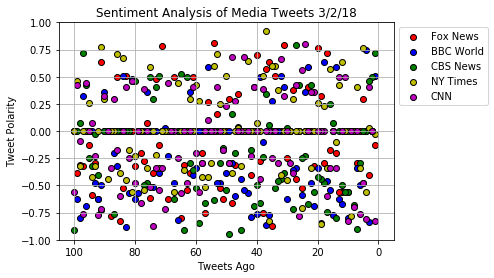

In [5]:
fox = plt.scatter(df['@FoxNews']["Tweets Ago"], df['@FoxNews']["Compound"] , marker="o", color="r", edgecolors="black", label = "Fox News")
bbc = plt.scatter(df['@BBCWorld']["Tweets Ago"], df['@BBCWorld']["Compound"] , marker="o", color="b", edgecolors="black", label = "BBC World")
cbs = plt.scatter(df['@CBSNews']["Tweets Ago"], df['@CBSNews']["Compound"] , marker="o", color="g", edgecolors="black", label = "CBS News")
nytimes = plt.scatter(df['@nytimes']["Tweets Ago"], df['@nytimes']["Compound"] , marker="o", color="y", edgecolors="black", label = "NY Times")
cnn = plt.scatter(df['@CNN']["Tweets Ago"], df['@CNN']["Compound"] , marker="o", color="m", edgecolors="black", label = "CNN")

plt.xlim(max(df["@FoxNews"]["Tweets Ago"]) + 5, -5)
plt.ylim(-1,1)
plt.grid()

plt.title("Sentiment Analysis of Media Tweets 3/2/18")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.legend(handles=[fox, bbc, cbs, nytimes, cnn], loc='upper left', bbox_to_anchor=(1,1))

plt.show()

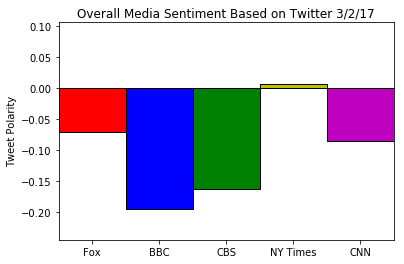

In [31]:
df_list = [df['@FoxNews'], df['@BBCWorld'], df['@CBSNews'], df['@nytimes'], df['@CNN']]
mean_list = []
for dataframe in df_list:
    mean_list.append(dataframe["Compound"].mean())
    
x_axis = np.arange(5)
x_ticks = ["Fox", "BBC", "CBS", "NY Times", "CNN"]
colors = ["r", "b", 'g', 'y', 'm']

tick_locations = [value+0.5 for value in x_axis]
plt.xticks(tick_locations, x_ticks)
plt.ylim(min(mean_list) - .05, max(mean_list) + .1)
plt.xlim(0,5)

edgecolors = ["black", "black", "black", "black", "black"]

news_bar = plt.bar(x_axis, mean_list, align="edge", color = colors, width = 1, edgecolor = edgecolors)

plt.title("Overall Media Sentiment Based on Twitter 3/2/17")
plt.ylabel("Tweet Polarity")

plt.show()

In [32]:
mean_list

[-0.070995,
 -0.19467599999999993,
 -0.16335899999999998,
 0.005843000000000003,
 -0.08478299999999997]

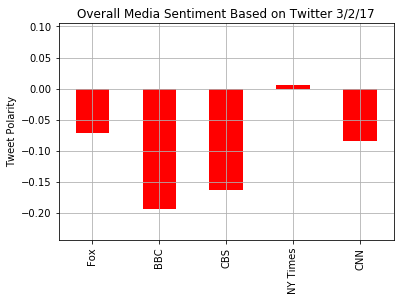

In [8]:
df_list = [df['@FoxNews'], df['@BBCWorld'], df['@CBSNews'], df['@nytimes'], df['@CNN']]
mean_list = []
for dataframe in df_list:
    mean_list.append(dataframe["Compound"].mean())
    
x_axis = ["Fox", "BBC", "CBS", "NY Times", "CNN"]
colors = ["r", "b", 'g', 'y', 'm']

bar_series = pd.Series(mean_list, index = x_axis)

graph = bar_series.plot.bar(color = colors)


plt.ylim(min(mean_list) - .05, max(mean_list) + .1)
plt.title("Overall Media Sentiment Based on Twitter 3/2/17")
plt.ylabel("Tweet Polarity")

plt.grid()
plt.show()

In [38]:
main_df.head()

,Compound,Date,Negative,Network,Neutral,Positive,Tweet Text,Tweets Ago
0,0.0000,Sun Mar 04 22:49:06 +0000 2018,0.000,@FoxNews,1.000,0.000,.@united flight experiences extreme turbulence...,1
1,0.0000,Sun Mar 04 22:48:43 +0000 2018,0.000,@FoxNews,1.000,0.000,Ryan Seacrest expected to get cold shoulder on...,2
2,-0.5267,Sun Mar 04 22:40:34 +0000 2018,0.239,@FoxNews,0.761,0.000,".@TomFitton: ""The dossier is the reason for th...",3
3,0.0000,Sun Mar 04 22:30:12 +0000 2018,0.000,@FoxNews,1.000,0.000,"On ""Sunday Morning Futures with @MariaBartirom...",4
4,0.4215,Sun Mar 04 22:28:05 +0000 2018,0.145,@FoxNews,0.542,0.313,"Trump, Netanyahu to meet amid growing uncertai...",5


In [43]:
api.user_timeline("@FoxNews", tweet_mode = "extended")

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Sun Mar 04 23:25:00 +0000 2018',
  'display_text_range': [0, 193],
  'entities': {'hashtags': [],
   'media': [{'display_url': 'pic.twitter.com/OvOl2ROdDY',
     'expanded_url': 'https://twitter.com/FoxNews/status/970439999156924416/video/1',
     'id': 969945060149288961,
     'id_str': '969945060149288961',
     'indices': [194, 217],
     'media_url': 'http://pbs.twimg.com/media/DXXzBzEWAAE1Pe9.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DXXzBzEWAAE1Pe9.jpg',
     'sizes': {'large': {'h': 360, 'resize': 'fit', 'w': 640},
      'medium': {'h': 360, 'resize': 'fit', 'w': 640},
      'small': {'h': 360, 'resize': 'fit', 'w': 640},
      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
     'type': 'photo',
     'url': 'https://t.co/OvOl2ROdDY'}],
   'symbols': [],
   'urls': [{'display_url': 'bit.ly/2CVnHBb',
     'expanded_url': 'http://bit.ly/2CVnHBb',
     'indices': [170, 193],
     'url': 'https://t.co